In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
# x=np.array([1,2,3,4,5,6,7,8,9,10])
# y=np.array([2,4,8,8,10,12,16,16,18,20])
x=np.array([2,4,5,3,8,10])#([1,2,3,4,5,6,7,8,9,10])
y=np.array([7,5,12,8,12,16])#([2,4,6,8,10,12,14,16,18,20])

In [18]:
xbar=np.mean(x)
ybar=np.mean(y)
upper=0
lower=0
for i in range(len(x)):
        sum=(x[i]-xbar)*(y[i]-ybar)
        upper=sum+upper
        deno=(x[i]-xbar)**2
        lower=deno+lower      

In [23]:
slope=upper/lower
slope

1.1408450704225352

In [26]:
interception= ybar - (slope*xbar)
interception

3.915492957746479

In [61]:
rss=0
tss=0
for i in range(len(x)):
      rs=(y[i]-interception-(slope*x[i]))**2
      rss=rss+rs
      ts=(y[i]-ybar)**2
      tss=tss+ts    

In [29]:
rss

20.3943661971831

In [30]:
tss

82.0

In [32]:
r2=1-(rss/tss)
r2

0.7512882171075231

In [67]:
ypreda=[]
for i in range(len(y)):
    point=interception+(slope*(x[i]))
    ypreda.append(point)
ypreda    

[6.19718309859155,
 8.47887323943662,
 9.619718309859156,
 7.338028169014085,
 13.04225352112676,
 15.323943661971832]

In [70]:
tsme=(rss/len(x))**0.5
tsme

1.8436542606638182

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

In [39]:
l=LinearRegression()
l.fit(x.reshape(-1,1),y)
ypred=l.predict(x.reshape(-1,1))
r2_score(y,ypred)

0.7512882171075232

In [66]:
print(ypred)

[ 6.1971831   8.47887324  9.61971831  7.33802817 13.04225352 15.32394366]


In [52]:
mean_squared_error(x,y)

25.333333333333332

In [71]:
np.sqrt(mean_squared_error(x,y))

5.033222956847166

In [73]:
import numpy as np
from scipy.spatial.distance import cdist
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [129]:
def kmean(x,k,nofi):
    dx=np.random.choice(len(x),k,replace=False)
    centroids=x[dx]
    print(centroids)
    dist=cdist(x,centroids,'euclidean')
    points=np.array([np.argmin(i) for i in dist])
    print("Points",points)
x=np.array([[1,2,3],[4,5,6],[7,8,9]])
kmean(x,1,10)

[[4 5 6]]
Points [0 0 0]


In [370]:
import numpy as np
from scipy.spatial.distance import cdist

df = np.array([[1,1,1,1,1,1],[2,2,2,2,2,2],[3,3,3,3,3,3],[4,4,4,4,4,4],[5,5,5,5,5,5],[6,6,6,6,6,6]])
k = 2
no_of_iterations = 50
indx = np.random.choice(len(df), k, replace=False)
print('dx',indx)
centroids = df[indx, :]
print("Initial Centroids:")
print(centroids)

distances = cdist(df, centroids, 'euclidean')
points = np.array([np.argmin(i) for i in distances])
print('chAD',points)
for i in range(no_of_iterations):
    centroids = []
    for indx in range(k):
        temp_cent = df[points == indx].mean(axis=0)
        centroids.append(temp_cent)
        # print('Its me',centroids)
    new_centroids = np.vstack(centroids)
    # print('Me again',new_centroids)
    distance= cdist(df, new_centroids, 'euclidean')
    pointsa = np.array([np.argmin(i) for i in distance])

print("Final Labels:")
print(pointsa)


dx [2 4]
Initial Centroids:
[[3 3 3 3 3 3]
 [5 5 5 5 5 5]]
chAD [0 0 0 0 1 1]
Final Labels:
[0 0 0 0 1 1]


C:\Users\DAXESH MAHERIYA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\DAXESH MAHERIYA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\DAXESH MAHERIYA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\DAXESH MAHERIYA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans 

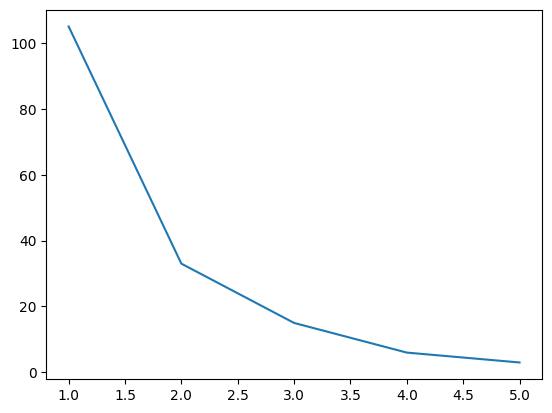

In [128]:
wcss=[]
for i in range(1,6):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df)#.reshape(-1,1))
    wcss.append(kmeans.inertia_)
plt.plot(range(1,6),wcss)
plt.show()

In [518]:
import numpy as np
from scipy.spatial.distance import cdist

df = np.array([[1,1,1,1,1,1],[2,2,2,2,2,2],[3,3,3,3,3,3],[4,4,4,4,4,4],[5,5,5,5,5,5],[6,6,6,6,6,6]])
k = 2
n=50
indx=np.random.choice(len(df),k,replace=False)
cent=df[indx,:]
dist=cdist(df,cent,'euclidean')
toinp=np.array([np.argmin(i) for i in dist])
for i in range(n):
    centro=[]
    for indx in range(k):
        temp=df[toinp==indx].mean(axis=0)
        centro.append(temp)
    new=np.vstack(centro)
    dista=cdist(df,new,'euclidean')
    pointsd=np.array([np.argmin(i) for i in dista])
print(toinp)
print(pointsd)

[1 1 0 0 0 0]
[1 1 0 0 0 0]


Initial cluster assignments:
[0 0 0 1 1 1]
Final cluster assignments:
[0 0 0 1 1 1]
